# Iris dataset

In [289]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

In [290]:
iris = datasets.load_iris()

In [291]:
X = iris['data'][:, (2,3)]
y = (iris['target']).astype(np.float64)

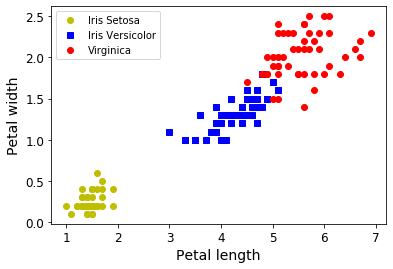

In [292]:
z = iris['target']
def plot_iris_dataset():
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris Setosa")    
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris Versicolor",)
    plt.plot(X[:, 0][y==2], X[:, 1][z==2], "ro", label="Virginica")
    plt.legend(loc="upper left", fontsize=10)

plot_iris_dataset()

In [293]:
y_binary = y == 0 # Satosa or not

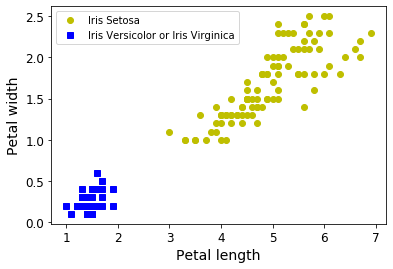

In [294]:
def plot_iris_binary_dataset():
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.plot(X[:, 0][y_binary==0], X[:, 1][y_binary==0], "yo", label="Iris Setosa")    
    plt.plot(X[:, 0][y_binary==1], X[:, 1][y_binary==1], "bs", label="Iris Versicolor or Iris Virginica")
    plt.legend(loc="upper left", fontsize=10)

plot_iris_binary_dataset()

In [323]:
setosa_or_versicolor = (y == 1) | (y == 2)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel="linear", C=10)
svm_clf.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

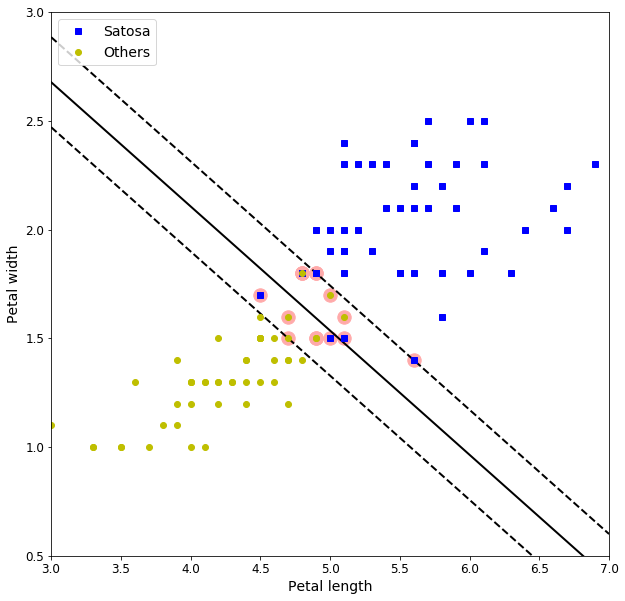

In [328]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # ax + bx + c =
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # Marking support vectors
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    
    # Plotting Decision boundary
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
    # Plotting Points
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bs", label="Satosa")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "yo", label="Others")
    
    plt.axis([3, 7, 0.5, 3])
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.rcParams["figure.figsize"] = (10,10)
    plt.show()

plot_svc_decision_boundary(svm_clf, 3, 7)